# Data Cleaning

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
df_data_1 = pd.read_csv("mainSimulationAccessTraces.csv")

# Missing Value

In [281]:
df_data_1['accessedNodeType'] = df_data_1['accessedNodeType'].fillna(value='/Malicious')

# Unexpected Values

In [282]:
df_data_1.loc[df_data_1.value=='twenty',"value"] = '20.0'
df_data_1.loc[df_data_1.value=='false',"value"] = '0'
df_data_1.loc[df_data_1.value=='true',"value"] = '1'
df_data_1.loc[df_data_1.value=='none',"value"] = '0'
df_data_1.loc[df_data_1.value=='0',"value"] = '0.0'
df_data_1['value'] = df_data_1['value'].fillna(value='60.0')
df_data_1 = df_data_1.drop(df_data_1.index[df_data_1.value.str.contains("org.*")])
df_data_1.value = df_data_1.value.astype(float)

# Cleaned Data

In [283]:
df_data_1.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,0.0,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,0.0,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,0.0,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,0.0,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,0.0,1520031603464,normal


# Frequency Distribution Visualization

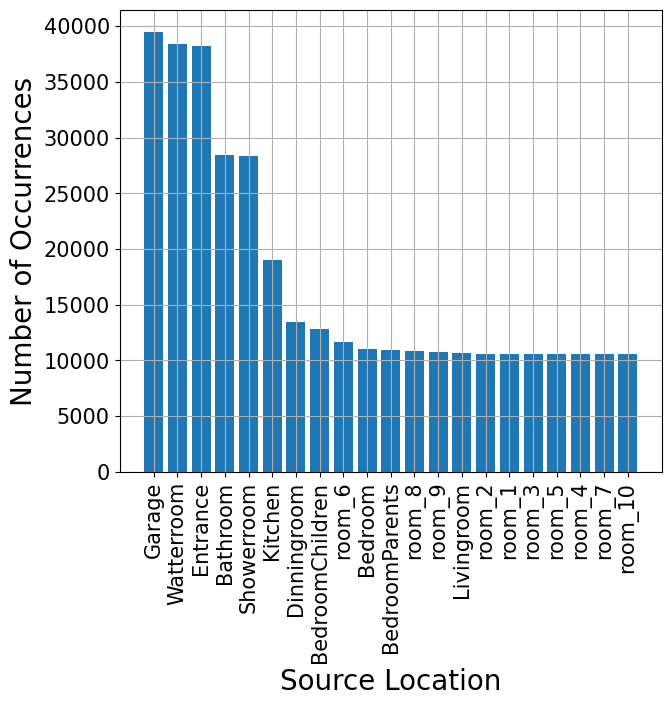

In [284]:
source_loc_count = df_data_1.sourceLocation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.bar(source_loc_count.index, source_loc_count.values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Source Location', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [285]:
for i,j in zip(source_loc_count.index,source_loc_count.values):
    print(i,j)

Garage 39499
Watterroom 38368
Entrance 38217
Bathroom 28461
Showerroom 28315
Kitchen 18962
Dinningroom 13429
BedroomChildren 12836
room_6 11642
Bedroom 11009
BedroomParents 10946
room_8 10798
room_9 10752
Livingroom 10620
room_2 10606
room_1 10601
room_3 10597
room_5 10596
room_4 10572
room_7 10558
room_10 10557


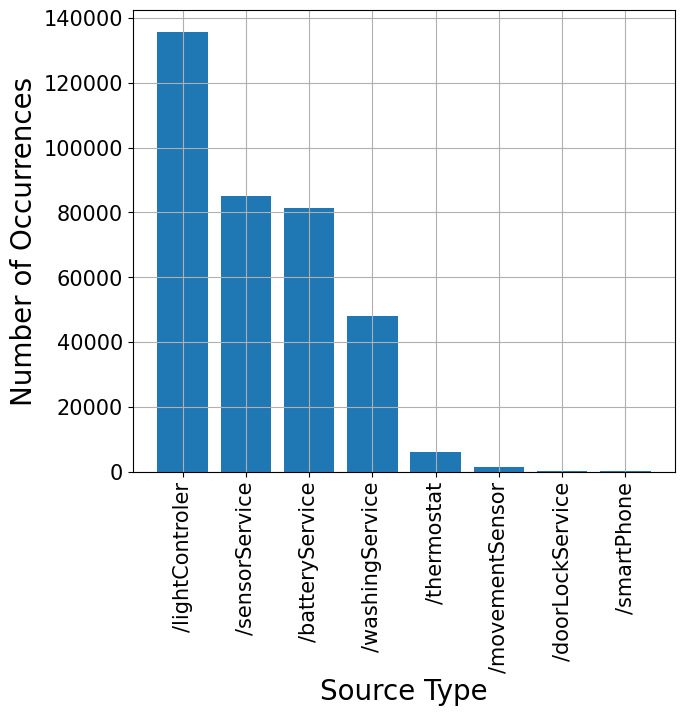

In [286]:
source_type_count = df_data_1.sourceType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(source_type_count.index, source_type_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Source Type', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [287]:
for i in source_type_count.index:
    print(i)

/lightControler
/sensorService
/batteryService
/washingService
/thermostat
/movementSensor
/doorLockService
/smartPhone


In [288]:
for i in source_type_count.values:
    print(i)

135775
85196
81267
47986
5980
1301
330
106


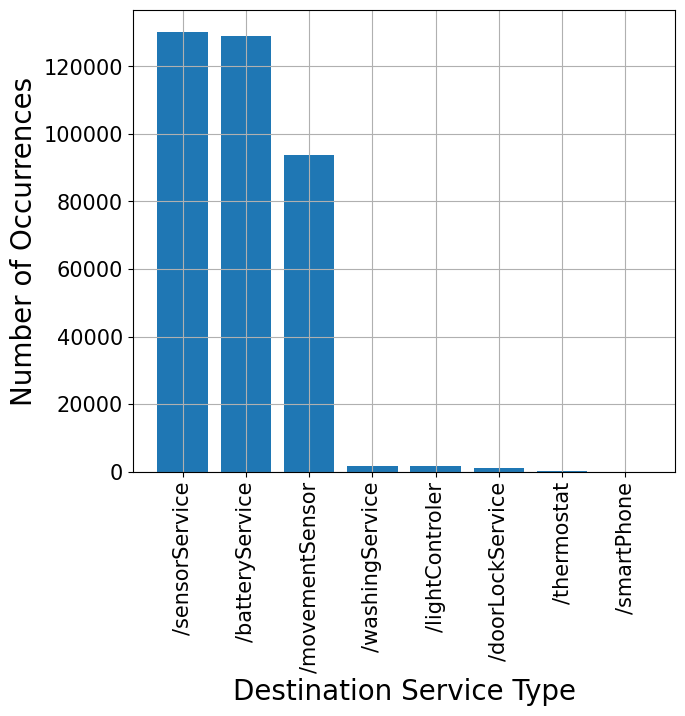

In [289]:
destination_type_count = df_data_1.destinationServiceType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(destination_type_count.index, destination_type_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Service Type', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [290]:
for i in destination_type_count.index:
    print(i)

/sensorService
/batteryService
/movementSensor
/washingService
/lightControler
/doorLockService
/thermostat
/smartPhone


In [291]:
for i in destination_type_count.values:
    print(i)

130313
129119
93645
1805
1694
1043
319
3


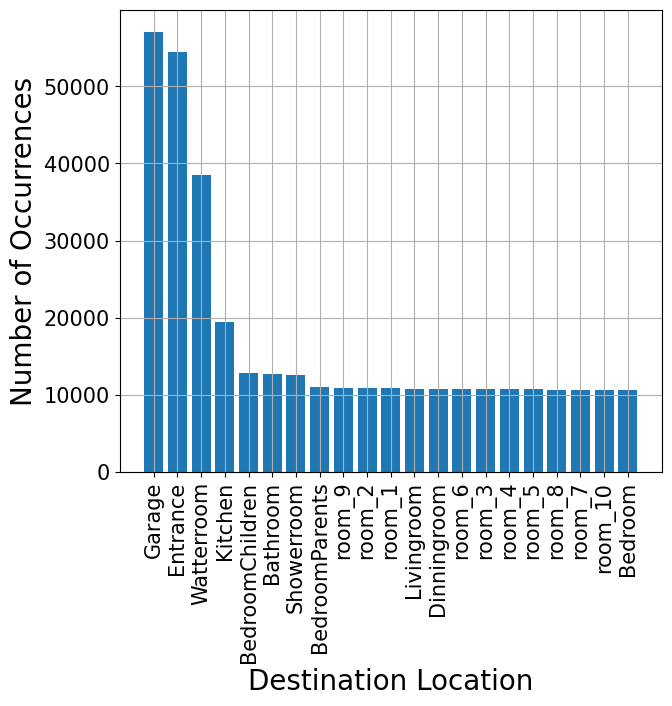

In [292]:
destination_location_count = df_data_1.destinationLocation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(destination_location_count.index, destination_location_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Location', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [293]:
for i in destination_location_count.index:
    print(i)

Garage
Entrance
Watterroom
Kitchen
BedroomChildren
Bathroom
Showerroom
BedroomParents
room_9
room_2
room_1
Livingroom
Dinningroom
room_6
room_3
room_4
room_5
room_8
room_7
room_10
Bedroom


In [294]:
for i in destination_location_count.values:
    print(i)

57100
54448
38524
19437
12768
12684
12583
10938
10843
10828
10805
10781
10759
10741
10732
10708
10687
10651
10649
10648
10627


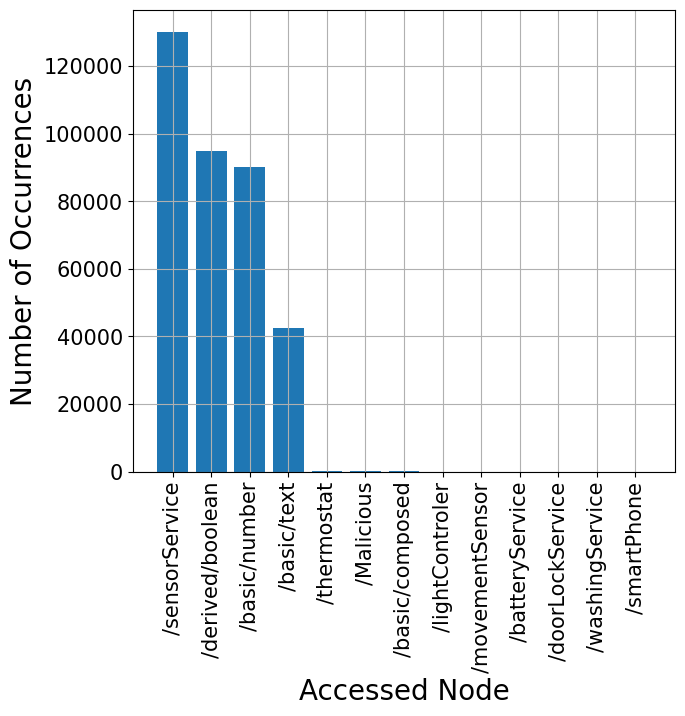

In [295]:
accessed_node_count = df_data_1.accessedNodeType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(accessed_node_count.index, accessed_node_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Accessed Node', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [296]:
for i in accessed_node_count.index:
    print(i)

/sensorService
/derived/boolean
/basic/number
/basic/text
/thermostat
/Malicious
/basic/composed
/lightControler
/movementSensor
/batteryService
/doorLockService
/washingService
/smartPhone


In [297]:
for i in accessed_node_count.values:
    print(i)

130155
94725
90010
42428
313
148
100
23
22
6
5
3
3


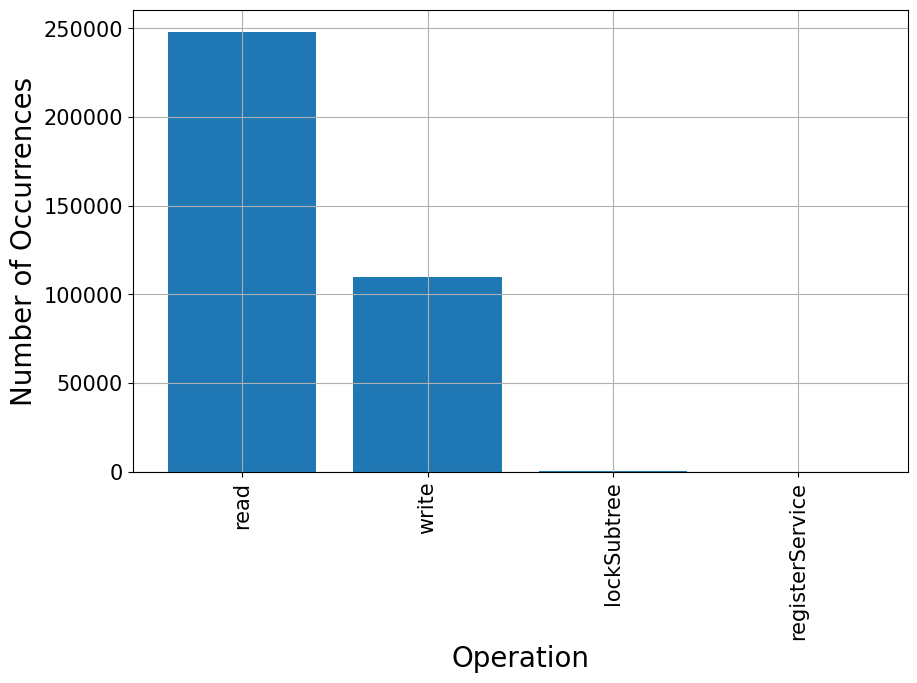

In [298]:
operation_count = df_data_1.operation.value_counts()
plt.figure(figsize=(10,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(operation_count.index, operation_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Operation', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [299]:
for i in operation_count.index:
    print(i)

read
write
lockSubtree
registerService


In [300]:
for i in operation_count.values:
    print(i)

248061
109648
148
84


# Making Features

In [301]:
df_1 = df_data_1.drop('timestamp',axis=1)

In [302]:
from sklearn.preprocessing import LabelEncoder
labelencoder0 = LabelEncoder()
labelencoder1 = LabelEncoder()
labelencoder4 = LabelEncoder()
labelencoder7 = LabelEncoder()
labelencodery = LabelEncoder()

In [303]:
X_0 = df_1.iloc[:,0].values
X_1 = df_1.iloc[:,1].values
X_4 = df_1.iloc[:,4].values
X_7 = df_1.iloc[:,7].values
y = df_1.iloc[:,11].values

In [304]:
X_0 = labelencoder0.fit_transform(X_0)
X_0 = X_0.reshape(len(X_0),1)
X_1 = labelencoder1.fit_transform(X_1)
X_1 = X_1.reshape(len(X_1),1)
X_4 = labelencoder4.fit_transform(X_4)
X_4 = X_4.reshape(len(X_4),1)
X_7 = labelencoder7.fit_transform(X_7)
X_7 = X_7.reshape(len(X_7),1)
y = labelencodery.fit_transform(y)

In [305]:
from sklearn.preprocessing import OneHotEncoder
ohe_2 = OneHotEncoder()
ohe_3 = OneHotEncoder()
ohe_5 = OneHotEncoder()
ohe_6 = OneHotEncoder()
ohe_8 = OneHotEncoder()
ohe_9 = OneHotEncoder()
le_2 = LabelEncoder()
le_3 = LabelEncoder()
le_5 = LabelEncoder()
le_6 = LabelEncoder()
le_8 = LabelEncoder()
le_9 = LabelEncoder()

In [306]:
X_2 = df_1.iloc[:,2].values
X_3 = df_1.iloc[:,3].values
X_5 = df_1.iloc[:,5].values
X_6 = df_1.iloc[:,6].values
X_8 = df_1.iloc[:,8].values
X_9 = df_1.iloc[:,9].values
X_10 = df_1.iloc[:,10].values

In [307]:
X_2 = le_2.fit_transform(X_2)
X_2 = X_2.reshape(len(X_2),1)
#X_2 = ohe_2.fit_transform(X_2)
X_3 = le_3.fit_transform(X_3)
X_3 = X_3.reshape(len(X_3),1)
#X_3 = ohe_3.fit_transform(X_3)
X_5 = le_5.fit_transform(X_5)
X_5 = X_5.reshape(len(X_5),1)
#X_5 = ohe_5.fit_transform(X_5)
X_6 = le_6.fit_transform(X_6)
X_6 = X_6.reshape(len(X_6),1)
#X_6 = ohe_6.fit_transform(X_6)
X_8 = le_8.fit_transform(X_8)
X_8 = X_8.reshape(len(X_8),1)
#X_8 = ohe_8.fit_transform(X_8)
X_9 = le_9.fit_transform(X_9)
X_9 = X_9.reshape(len(X_9),1)
#X_9 = ohe_9.fit_transform(X_9)
X_10 = X_10.reshape(len(X_10),1)

In [308]:
X = np.concatenate((X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10),axis=1)

In [309]:
labelencodery.classes_

array(['anomalous(DoSattack)', 'anomalous(dataProbing)',
       'anomalous(malitiousControl)', 'anomalous(malitiousOperation)',
       'anomalous(scan)', 'anomalous(spying)', 'anomalous(wrongSetUp)',
       'normal'], dtype=object)

In [310]:
labelencodery.transform(['anomalous(scan)'])

array([4])

In [311]:
y_resized = y.reshape(len(y),1)

In [312]:
df_spark = np.concatenate((y_resized,X),axis=1)

In [313]:
df_spark = pd.DataFrame(df_spark)
df_spark.to_csv('df_spark.csv')

# This Notebook starts from Preprocessed Dataframework. "df_spark.csv" is the dataframe

In [314]:
df_spark = pd.read_csv('df_spark.csv')

In [315]:
df_spark.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [316]:
df_spark = df_spark.drop(columns="Unnamed: 0")

In [317]:
df_spark.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


# In the following code X contains features and y contains label

In [318]:
y = df_spark.iloc[:,0].values
X = df_spark.iloc[:,1:].values

# The whole dataset is split into 80:20 ratio. X_train contains 80% of the features, X_test contains 20% of the features and y_train contains 80% corresponding label of X_train and y_test contains 20% corresponding label of X_test

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)

In [320]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

# 5-Fold Cross validation Estimation for Decision Tree

In [321]:
from sklearn import tree

In [322]:
pipe_tree = Pipeline([('scl', StandardScaler()),('clf', tree.DecisionTreeClassifier())])
train_sizes_tree, train_scores_tree, test_scores_tree = learning_curve(estimator=pipe_tree,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_tree = np.mean(train_scores_tree, axis=1)
train_std_tree = np.std(train_scores_tree, axis=1)
test_mean_tree = np.mean(test_scores_tree, axis=1)
test_std_tree = np.std(test_scores_tree, axis=1)

In [323]:
for i in train_mean_tree:
    print(i)

0.9866876200453991
0.9884634188929631
0.9906874414327372
0.9928566751498378
0.9942169078616528


In [324]:
for i in test_mean_tree:
    print(i)

0.9693971624416144
0.8910348744605854
0.9802230066278124
0.9884115207121322
0.9934738193929714


# 5-Fold Cross validation Estimation for Random Forest

In [325]:
from sklearn.ensemble import RandomForestClassifier

In [326]:
pipe_rnd = Pipeline([('scl', StandardScaler()),('clf', RandomForestClassifier(n_estimators=10))])
train_sizes_rnd, train_scores_rnd, test_scores_rnd = learning_curve(estimator=pipe_rnd,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_rnd = np.mean(train_scores_rnd, axis=1)
train_std_rnd = np.std(train_scores_rnd, axis=1)
test_mean_rnd = np.mean(test_scores_rnd, axis=1)
test_std_rnd = np.std(test_scores_rnd, axis=1)

In [327]:
for i in train_mean_rnd:
    print(i)

0.9866806355858216
0.9884634188929631
0.9906874414327372
0.9928566751498378
0.9942169078616528


In [328]:
for i in test_mean_rnd:
    print(i)

0.9582137237984419
0.9564285158529973
0.9801699251057695
0.9884813648200831
0.9932195868400298


Training and Testing accuracies and Standard Deviation of Training and Testing accuracies are given below

In [359]:
np.mean(train_mean_tree), np.mean(train_mean_rnd)

(0.990582412676518, 0.9905810157846027)

In [362]:
np.mean(train_std_tree), np.mean(train_std_tree)

(0.0018731735038651147, 0.0018731735038651147)

# The steps are similar to "Result Analysis on Preprocessed Data (Accuracy, Precision, Recall, F1, Confusion Matrix).ipynb"

Evaluation Metrics Calculations for Decision

In [329]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming you have already split your data into training and testing sets
# X_train, X_test, y_train, y_test = ...

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [330]:
# Calculate multilabel confusion matrix
conf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("Multilabel Confusion Matrix:")
print(conf_matrix)

Multilabel Confusion Matrix:
[[[70411     0]
  [  403   775]]

 [[71526     0]
  [    0    63]]

 [[71420     0]
  [    0   169]]

 [[71434     0]
  [    0   155]]

 [[71284     0]
  [    0   305]]

 [[71467     2]
  [    0   120]]

 [[71561     0]
  [    0    28]]

 [[ 1615   403]
  [    2 69569]]]


In [331]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9943427062816913


In [332]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

In [333]:
# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9943427062816913
Recall: 0.9943427062816913
F1-score: 0.9943427062816913


In [334]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.66      0.79      1178
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00       169
         3.0       1.00      1.00      1.00       155
         4.0       1.00      1.00      1.00       305
         5.0       0.98      1.00      0.99       120
         6.0       1.00      1.00      1.00        28
         7.0       0.99      1.00      1.00     69571

    accuracy                           0.99     71589
   macro avg       1.00      0.96      0.97     71589
weighted avg       0.99      0.99      0.99     71589



Evaluation Metrics Calculations for Random forest

In [335]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming you have already split your data into training and testing sets
# X_train, X_test, y_train, y_test = ...

# Initialize and train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate multilabel confusion matrix
conf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("Multilabel Confusion Matrix:")
print(conf_matrix)

Multilabel Confusion Matrix:
[[[70411     0]
  [  403   775]]

 [[71526     0]
  [    0    63]]

 [[71420     0]
  [    0   169]]

 [[71434     0]
  [    0   155]]

 [[71284     0]
  [    0   305]]

 [[71469     0]
  [    0   120]]

 [[71561     0]
  [    0    28]]

 [[ 1615   403]
  [    0 69571]]]


In [336]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9943706435346212


In [337]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9943706435346212
Recall: 0.9943706435346212
F1-score: 0.9943706435346212


In [338]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.66      0.79      1178
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00       169
         3.0       1.00      1.00      1.00       155
         4.0       1.00      1.00      1.00       305
         5.0       1.00      1.00      1.00       120
         6.0       1.00      1.00      1.00        28
         7.0       0.99      1.00      1.00     69571

    accuracy                           0.99     71589
   macro avg       1.00      0.96      0.97     71589
weighted avg       0.99      0.99      0.99     71589



In [339]:
df_spark.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [340]:
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [341]:
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])

In [342]:
n_classes = y.shape[1]

In [343]:
n_classes

8

In [344]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)

In [345]:
from sklearn import tree

In [346]:
pipe_tree = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(tree.DecisionTreeClassifier()))])

In [347]:
from sklearn.ensemble import RandomForestClassifier

In [348]:
pipe_rnd = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(RandomForestClassifier(warm_start=True,n_estimators=10)))])

# Decision Tree

In [349]:
pipe_tree = pipe_tree.fit(X_train, y_train)

In [350]:
y_score_tree = pipe_tree.predict_proba(X_test)
fpr_tree = dict()
tpr_tree = dict()
roc_auc_tree = dict()
for i in range(n_classes):
    fpr_tree[i], tpr_tree[i], _ = roc_curve(y_test[:, i], y_score_tree[:, i])
    roc_auc_tree[i] = auc(fpr_tree[i], tpr_tree[i])

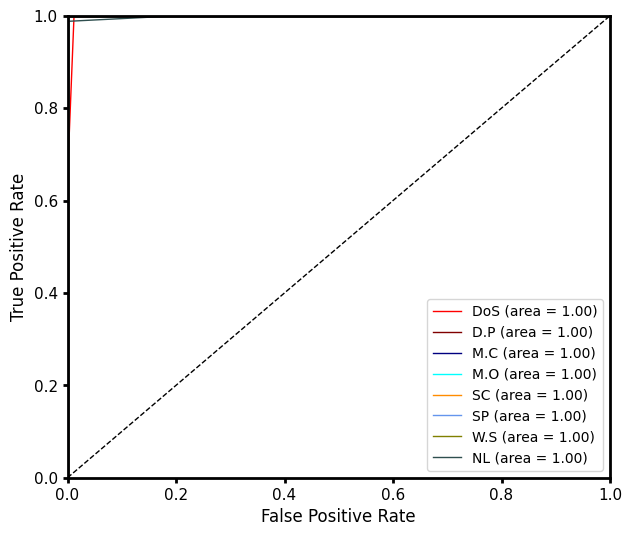

In [351]:
lw = 1
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_tree[i], tpr_tree[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_tree[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11 )
plt.yticks(fontsize=11 )
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12 )
plt.ylabel('True Positive Rate',fontsize=12 )
plt.legend(loc="lower right")
#plt.savefig("ROC_of_Decision_Tree")

# Random Forest

In [352]:
pipe_rnd = pipe_rnd.fit(X_train, y_train)

In [353]:
y_score_rnd = pipe_rnd.predict_proba(X_test)
fpr_rnd = dict()
tpr_rnd = dict()
roc_auc_rnd = dict()
for i in range(n_classes):
    fpr_rnd[i], tpr_rnd[i], _ = roc_curve(y_test[:, i], y_score_rnd[:, i])
    roc_auc_rnd[i] = auc(fpr_rnd[i], tpr_rnd[i])

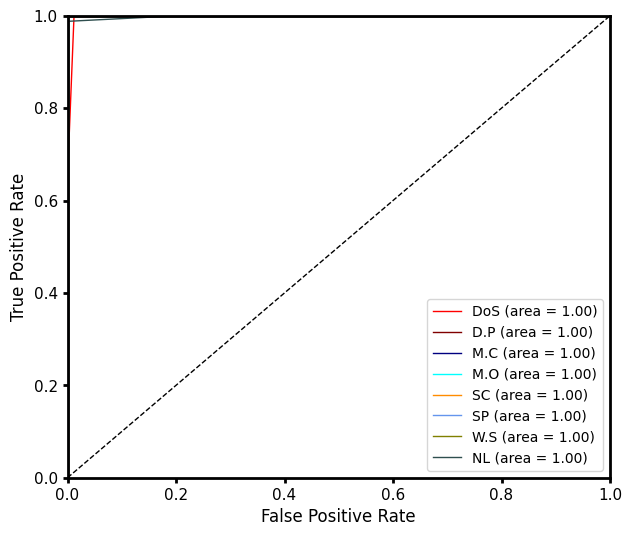

In [354]:
lw = 1
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rnd[i], tpr_rnd[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_rnd[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11 )
plt.yticks(fontsize=11 )
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.legend(loc="lower right")
#plt.savefig("ROC_of_Random_Forrest")